Load Data

In [0]:
def convert_to_dollar(saham) :
  usd = 15589
  dollar = []
  for x in saham :
    dollar.append(x/usd)
  return dollar


In [985]:
import pandas as pd
import regex as re
"""
kode_saham = ["AAPL","BA","BATA.JK","BKRKF","CSCO","IBM",
              "TLKMF","AKPI.JK","INTC","MSFT","NVDA",
              "ORCL","PBCRF","PHJMF","PTAIF","SPR"]
"""

#fix 
"""
kode_saham = ["BKRKF",
              "TLKMF",
              "PHJMF"]

"""
# variansi besar
#kode_saham = ["AAPL","BA","BATA.JK","AKPI.JK","INTC","MSFT","NVDA","ORCL","CSCO","IBM","SPR"]

#kode_saham = ["BATA.JK","AKPI.JK"]

kode_saham =["SGRO.JK","TLKM.JK","INDR.JK","PRDA.JK","AKPI.JK"]
#kode_saham =["SGRO.JK","PHJMF"]
kode_tmp = []
sama = False
for i in kode_saham :
  if i in kode_tmp :
    sama =  True
    kodenya = i
    break
  else :
      kode_tmp.append(i)

if sama :
  dataset = []
  print("ada yang sama", kodenya)
else :
  n = len(kode_saham)
  github = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/Data/"

  df = []
  for i in range(n) :
    datas = pd.read_csv(github+kode_saham[i]+".csv")

    if re.findall(".JK",kode_saham[i]):
      tmp = datas["Close"].tolist()
      data_tmp = convert_to_dollar(tmp)
    else :
      data_tmp =datas["Close"]
    df.append(pd.DataFrame(data_tmp))
    #print(data_tmp.shape)
  dataset = pd.concat(df, axis=1, sort=False)
  dataset = dataset.dropna()
  dataset.columns = kode_saham
dataset

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
0,0.121881,0.256591,0.048432,0.367246,0.056771
1,0.121881,0.253384,0.048432,0.367246,0.057733
2,0.123485,0.245686,0.048432,0.352813,0.063506
3,0.127654,0.249535,0.046828,0.362435,0.053563
4,0.128296,0.253384,0.051960,0.354417,0.051318
...,...,...,...,...,...
100,0.150106,0.235422,0.416961,0.132144,0.046186
101,0.153313,0.239271,0.416961,0.143691,0.048111
102,0.155879,0.241196,0.402527,0.147540,0.044903
103,0.152030,0.240554,0.380076,0.146257,0.044903


In [986]:
rho = dataset.corr().values
dataset.corr()

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
SGRO.JK,1.000000,-0.336531,0.282667,-0.599204,-0.559313
TLKM.JK,-0.336531,1.000000,-0.647548,0.348964,0.244041
INDR.JK,0.282667,-0.647548,1.000000,-0.715454,-0.019710
PRDA.JK,-0.599204,0.348964,-0.715454,1.000000,0.189698
AKPI.JK,-0.559313,0.244041,-0.019710,0.189698,1.000000


In [987]:
"""import numpy as np
#print(type(dataset.corr()))
list_corr = []
for x in dataset:
  print(type(dataset.corr()[x]))
  #print(dataset[x].corr())
  #list_corr.append(dataset[x].corr().tolist())
  #print(dataset.corr()[x].tolist())
#rho = np.array(list_corr)
#print(rho)"""

'import numpy as np\n#print(type(dataset.corr()))\nlist_corr = []\nfor x in dataset:\n  print(type(dataset.corr()[x]))\n  #print(dataset[x].corr())\n  #list_corr.append(dataset[x].corr().tolist())\n  #print(dataset.corr()[x].tolist())\n#rho = np.array(list_corr)\n#print(rho)'

In [988]:
import statistics as st
var = []
for x in kode_saham :
  tmp = dataset[x].tolist()
  #print(tmp)
  var.append(st.variance(tmp))
#print(var)
df_var = pd.DataFrame([var])
df_var.columns = kode_saham
df_var

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
0,0.000177,0.0006,0.020704,0.003107,0.000029



# Multi sekuritas


In [989]:
import numpy as np

std_dev = []
for i in var :
  std_dev.append(np.sqrt(i))
n = len(std_dev)

u = np.ones(n)
"""#print(u)
#rho = np.zeros((n,n))
#rho[0][1] = 0.1

#rho[0][2] = 0.2
#rho[0][3] = 0.2
#rho[0][4] = 0.2
#rho[1][2] = 0.2
#rho[1][3] = 0.2
#rho[1][4] = 0.2
#rho[2][3] = 0.2
#rho[2][4] = 0.2
#rho[3][4] = 0.2

for i in range(n) :
  for j in range(n) :
    if j == i :
      rho[i][j] = 1
    elif j < i :
      rho[i][j] = rho[j][i]
print(rho)"""

'#print(u)\n#rho = np.zeros((n,n))\n#rho[0][1] = 0.1\n\n#rho[0][2] = 0.2\n#rho[0][3] = 0.2\n#rho[0][4] = 0.2\n#rho[1][2] = 0.2\n#rho[1][3] = 0.2\n#rho[1][4] = 0.2\n#rho[2][3] = 0.2\n#rho[2][4] = 0.2\n#rho[3][4] = 0.2\n\nfor i in range(n) :\n  for j in range(n) :\n    if j == i :\n      rho[i][j] = 1\n    elif j < i :\n      rho[i][j] = rho[j][i]\nprint(rho)'

In [990]:


def is_short_selling(rho,std_dev):
  n = len(rho)
  print(n)
  check = False
  #rho = rho.sort()
  #std_Dev =std_dev.sort()
  sahamnya = []
  for i in range(n):
    for j in range(n):
      if i < j :
        x = std_dev[i]/std_dev[j]
        #print(rho[i][j])
        if rho[i][j] > x :
          check =True
          sahamnya.append([kode_saham[i],kode_saham[j]])
    
  return [check,sahamnya]

if(is_short_selling(rho,std_dev)[0]) :
  short = {}
  list_short = is_short_selling(rho,std_dev)[1]
  print(list_short)
  for i in list_short :
    x = i[0]
    y = i[1]
    if x not in short.keys():
      short[x] =1
    else :
      short[x] += 1
    
    if y not in short.keys():
      short[y] = 1
    else :
      short[y] += 1
  print(short)
else :
  print("aman")
  print(kode_saham)

5
5
[['SGRO.JK', 'INDR.JK']]
{'SGRO.JK': 1, 'INDR.JK': 1}


In [0]:
C = (np.zeros((n,n)))

for i in range(n):
  for j in range(n) :
    C[i][j] = std_dev[i]*rho[i][j]*std_dev[j]
#print(C)

In [992]:
from numpy.linalg import inv
from numpy.linalg import det
u = np.ones(n)
uT = np.transpose(u)

CInv = inv(C)

w = np.dot(u,CInv)/(u.dot(CInv).dot(uT))
print(w)

[0.30097929 0.04269055 0.01155221 0.04996324 0.59481471]


In [993]:
#w = np.array([0.3,0.4])
wT = np.transpose(w)
x = np.dot(u,wT)
print("jumlah w = ",x)

jumlah w =  1.0


In [994]:
risk = w.dot(C).dot(wT)
print(round(risk,4))

0.0


Expected return saham


In [0]:
import math
def find_ud(saham) :
  K = []
  
  
  for i in range(len(saham)-1) :
    x = (saham[i+1]-saham[i])/saham[i]
    K.append(x)
  up = []
  down = []

  for i in K :
    if i > 0 :
      x = 1
      y = 0
    else :
      x = 0
      y = 1
    up.append(x)
    down.append(y)
  
  x_up = 1
  x_down = 1

  sum_u = 0
  sum_d = 0

  for i in range(len(K)) :
    x_up += K[i]*up[i]
    sum_u += up[i]
    x_down += K[i]*down[i]
    sum_d += down[i]
  
  u = x_up/sum_u
  d = x_up/sum_d

  p = sum_u/(sum_u+sum_d)
  q = 1-p

  result = {"u" : u, "d" : d,"p":p,"q":q}
  
  return result

In [0]:
def return_saham(df_saham) :
  result = {}
  for saham in df_saham :
    x = find_ud(df_saham[saham])
    exp = (x["u"]*x["p"])+(x["d"]*x["q"])
    result[saham] = exp
  return result

In [0]:
return_ = return_saham(dataset)
m = []
for saham in return_ :
  m.append(return_[saham])

In [998]:

import pandas as pd

m = np.array(m)
print(m)
EK = m.dot(wT)
print("ekspektasi return = ", EK)
risk = w.dot(C).dot(wT)
print("risk = ",risk)

portfolio=[round(x,4) for x in w]
portfolio.append(EK)
portfolio.append(risk)
print(portfolio)

df_port = pd.DataFrame([portfolio])
column = kode_saham
print(kode_saham)
column.append("Expected Return")
column.append("Risiko")
df_port.columns = column
df_port

[0.03296868 0.04091494 0.12227148 0.039591   0.07927717]
ekspektasi return =  0.062215400064378555
risk =  9.036988165767118e-06
[0.301, 0.0427, 0.0116, 0.05, 0.5948, 0.062215400064378555, 9.036988165767118e-06]
['SGRO.JK', 'TLKM.JK', 'INDR.JK', 'PRDA.JK', 'AKPI.JK']


,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK,Expected Return,Risiko
0,0.301,0.0427,0.0116,0.05,0.5948,0.062215,0.000009


In [999]:
mT = np.transpose(m)
e_r = EK
w_new = []
list_EK = []
for i in range(4) :
  e_r *= 1.02
  list_EK.append(e_r)
  
  matA = np.dot(u,(CInv))
  matB = np.dot(m,(CInv))
  mat1 = u.dot(CInv).dot(mT)
  mat2 = m.dot(CInv).dot(mT)
  mat3 = u.dot(CInv).dot(uT)
  mat4 = m.dot(CInv).dot(uT)

  A1 = np.array([[1,mat1],[e_r,mat2]]) 
  A2 = np.array([[mat3,1],[mat4,e_r]])
  A3 = np.array([[mat3,mat1],[mat4,mat2]])

  det1 = det([[1,mat1],[e_r,mat2]])
  det2 = det([[mat3,1],[mat4,e_r]])
  det3 = det([[mat3,mat1],[mat4,mat2]])
  w = ((det1*matA)+(det2*matB))/det3
  w_new.append(w)
print(w_new)
print(list_EK)

[array([0.28522427, 0.03266899, 0.00953483, 0.04449526, 0.62807665]), array([0.26915414, 0.022447  , 0.0074771 , 0.03891792, 0.66200384]), array([0.25276262, 0.01202058, 0.00537821, 0.03322903, 0.69660957]), array([0.23604326, 0.00138562, 0.00323734, 0.02742636, 0.73190742])]
[0.06345970806566613, 0.06472890222697945, 0.06602348027151904, 0.06734394987694942]


In [1000]:
list_bobot = []
i = 0
for bobot in w_new :
  tmp = []
  wT = np.transpose(bobot)
  risk = bobot.dot(C).dot(wT)
  for x in bobot :
    tmp.append(x)
  tmp.append(list_EK[i])
  tmp.append(risk)
  list_bobot.append(tmp)
  i+=1
print(list_bobot)

df = pd.DataFrame(list_bobot)
df.columns = column
df_tmp =df_port
new_df = df_tmp.append(df,ignore_index=True)
new_df

[[0.2852242669822272, 0.03266899240180597, 0.00953482787587406, 0.04449525875987173, 0.6280766539802217, 0.06345970806566613, 9.108450886136002e-06], [0.2691541423214392, 0.022447004503563444, 0.007477095708893093, 0.03891791632791389, 0.6620038411381903, 0.06472890222697945, 9.328584649960261e-06], [0.25276261516743587, 0.012020576847356173, 0.005378208898572535, 0.03322902704731698, 0.6966095720393191, 0.06602348027151904, 9.706311446386593e-06], [0.23604325747035196, 0.001385620638024663, 0.0032373443520455417, 0.027426359981108036, 0.7319074175584696, 0.06734394987694942, 1.0250972026502937e-05]]


,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK,Expected Return,Risiko
0,0.301000,0.042700,0.011600,0.050000,0.594800,0.062215,0.000009
1,0.285224,0.032669,0.009535,0.044495,0.628077,0.063460,0.000009
2,0.269154,0.022447,0.007477,0.038918,0.662004,0.064729,0.000009
3,0.252763,0.012021,0.005378,0.033229,0.696610,0.066023,0.000010
4,0.236043,0.001386,0.003237,0.027426,0.731907,0.067344,0.000010


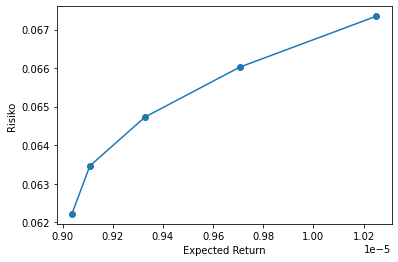

In [1001]:
import matplotlib.pyplot as plt

y = new_df["Expected Return"]
x = new_df["Risiko"]

plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Expected Return")
plt.ylabel("Risiko")
plt.show()